In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('data.csv')

### 전류 분포

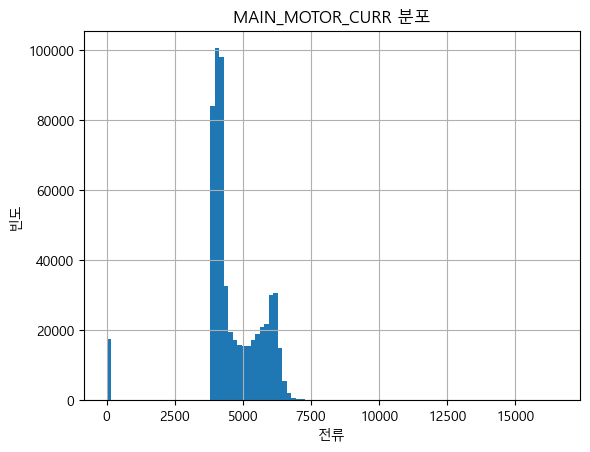

In [4]:
plt.hist(df['MAIN_MOTOR_CURR'], bins=100)
plt.title("MAIN_MOTOR_CURR 분포")
plt.xlabel("전류")
plt.ylabel("빈도")
plt.grid(True)
plt.show()


In [5]:
df['MAIN_MOTOR_CURR'].value_counts()

MAIN_MOTOR_CURR
0.00       17488
3870.00     3116
3876.00     3104
3873.00     3095
3869.00     3087
           ...  
4839.33        1
5138.00        1
4455.50        1
4566.25        1
5031.71        1
Name: count, Length: 5400, dtype: int64

In [6]:
df['MAIN_MOTOR_ALM'].value_counts()

MAIN_MOTOR_ALM
0.0       520995
2570.0     58302
Name: count, dtype: int64

In [6]:
df1 = pd.read_csv('cycle_19.csv')

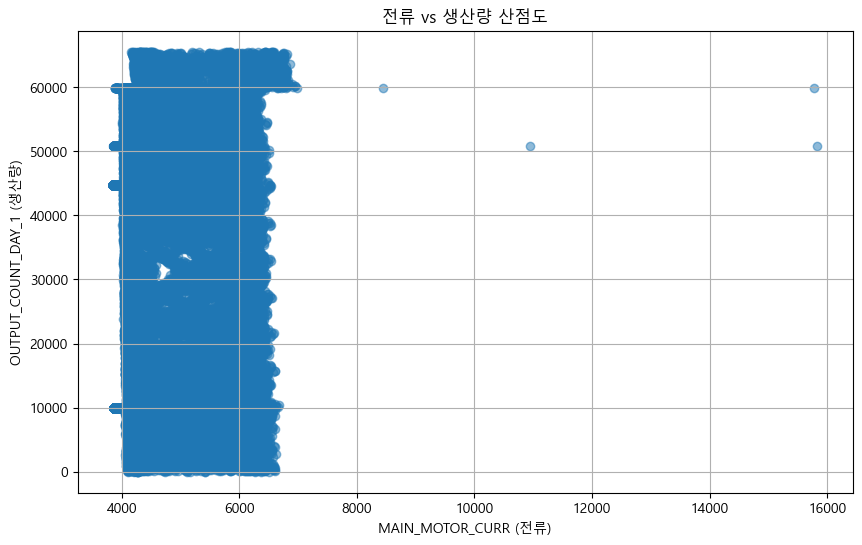

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['MAIN_MOTOR_CURR'], df1['OUTPUT_COUNT_DAY_1'], alpha=0.5)
plt.title("전류 vs 생산량 산점도")
plt.xlabel("MAIN_MOTOR_CURR (전류)")
plt.ylabel("OUTPUT_COUNT_DAY_1 (생산량)")
plt.grid(True)
plt.show()

In [15]:
corr = df1['MAIN_MOTOR_CURR'].corr(df1['OUTPUT_COUNT_DAY_1'])
print(f'상관계수: {corr:.2f}')


상관계수: 0.08


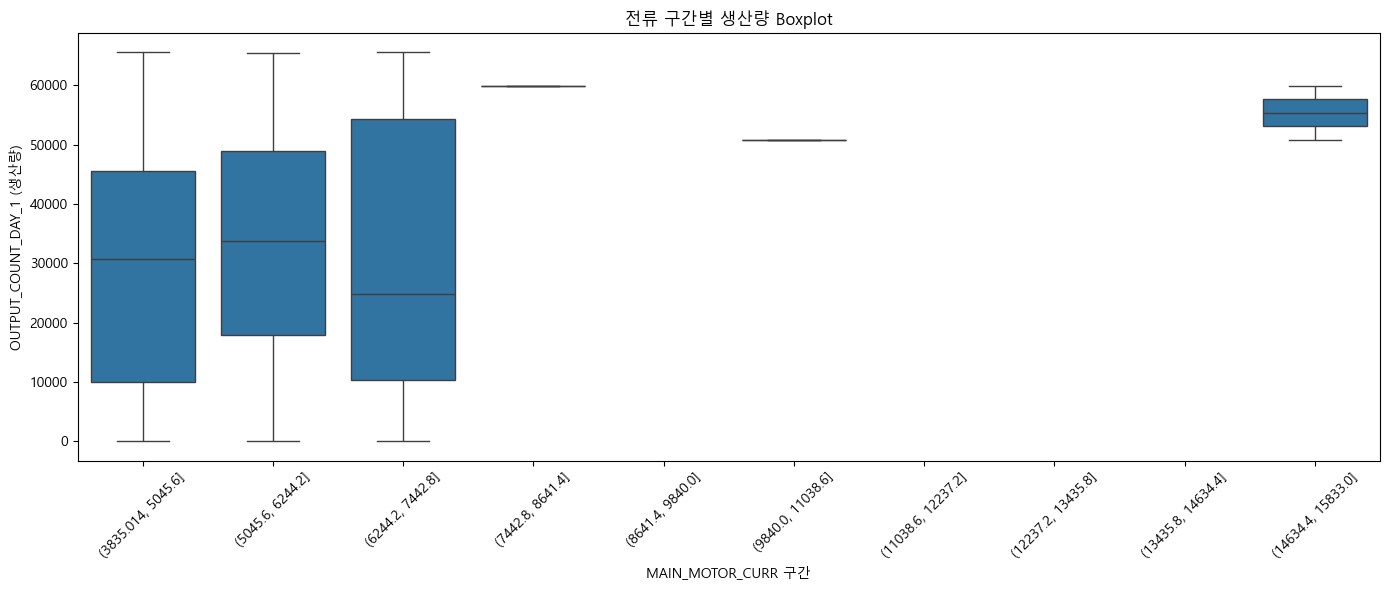

In [10]:
df1['CURR_BIN'] = pd.cut(df1['MAIN_MOTOR_CURR'], bins=10)

plt.figure(figsize=(14, 6))
sns.boxplot(x='CURR_BIN', y='OUTPUT_COUNT_DAY_1', data=df1)
plt.title("전류 구간별 생산량 Boxplot")
plt.xlabel("MAIN_MOTOR_CURR 구간")
plt.ylabel("OUTPUT_COUNT_DAY_1 (생산량)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(df1.groupby('CURR_BIN')['OUTPUT_COUNT_DAY_1'].median())

CURR_BIN
(3835.014, 5045.6]    30688.50
(5045.6, 6244.2]      33771.50
(6244.2, 7442.8]      24914.50
(7442.8, 8641.4]      59893.50
(8641.4, 9840.0]           NaN
(9840.0, 11038.6]     50863.50
(11038.6, 12237.2]         NaN
(12237.2, 13435.8]         NaN
(13435.8, 14634.4]         NaN
(14634.4, 15833.0]    55376.25
Name: OUTPUT_COUNT_DAY_1, dtype: float64


C:\Users\탁세윤\AppData\Local\Temp\ipykernel_22764\2524354958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df1.groupby('CURR_BIN')['OUTPUT_COUNT_DAY_1'].median())


In [12]:
df2 = pd.read_csv('cycle_31.csv')

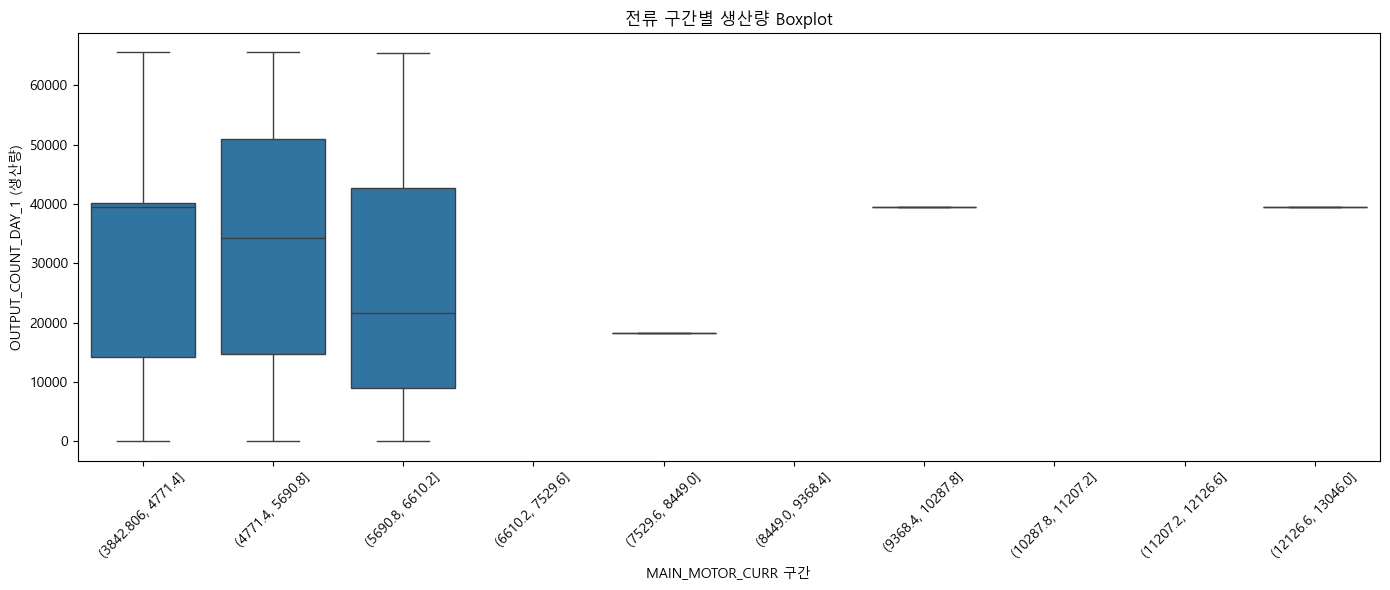

In [13]:
df2['CURR_BIN'] = pd.cut(df2['MAIN_MOTOR_CURR'], bins=10)

plt.figure(figsize=(14, 6))
sns.boxplot(x='CURR_BIN', y='OUTPUT_COUNT_DAY_1', data=df2)
plt.title("전류 구간별 생산량 Boxplot")
plt.xlabel("MAIN_MOTOR_CURR 구간")
plt.ylabel("OUTPUT_COUNT_DAY_1 (생산량)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
print(df2.groupby('CURR_BIN')['OUTPUT_COUNT_DAY_1'].median())

CURR_BIN
(3842.806, 4771.4]    39537.0
(4771.4, 5690.8]      34339.5
(5690.8, 6610.2]      21586.5
(6610.2, 7529.6]          NaN
(7529.6, 8449.0]      18211.0
(8449.0, 9368.4]          NaN
(9368.4, 10287.8]     39539.0
(10287.8, 11207.2]        NaN
(11207.2, 12126.6]        NaN
(12126.6, 13046.0]    39540.0
Name: OUTPUT_COUNT_DAY_1, dtype: float64


C:\Users\탁세윤\AppData\Local\Temp\ipykernel_22764\4227260951.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df2.groupby('CURR_BIN')['OUTPUT_COUNT_DAY_1'].median())


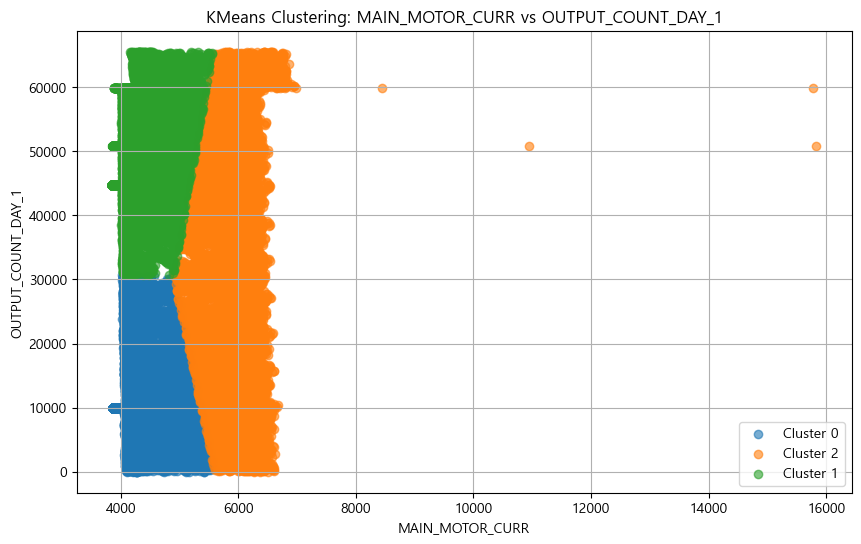

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = df1[['MAIN_MOTOR_CURR', 'OUTPUT_COUNT_DAY_1']].dropna()

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# 시각화
plt.figure(figsize=(10, 6))
for label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == label]
    plt.scatter(cluster_data['MAIN_MOTOR_CURR'], cluster_data['OUTPUT_COUNT_DAY_1'], label=f'Cluster {label}', alpha=0.6)

plt.xlabel('MAIN_MOTOR_CURR')
plt.ylabel('OUTPUT_COUNT_DAY_1')
plt.title('KMeans Clustering: MAIN_MOTOR_CURR vs OUTPUT_COUNT_DAY_1')
plt.legend()
plt.grid(True)
plt.show()